## 海洋气象一百张绘图计划

### 1、频散曲线关系图

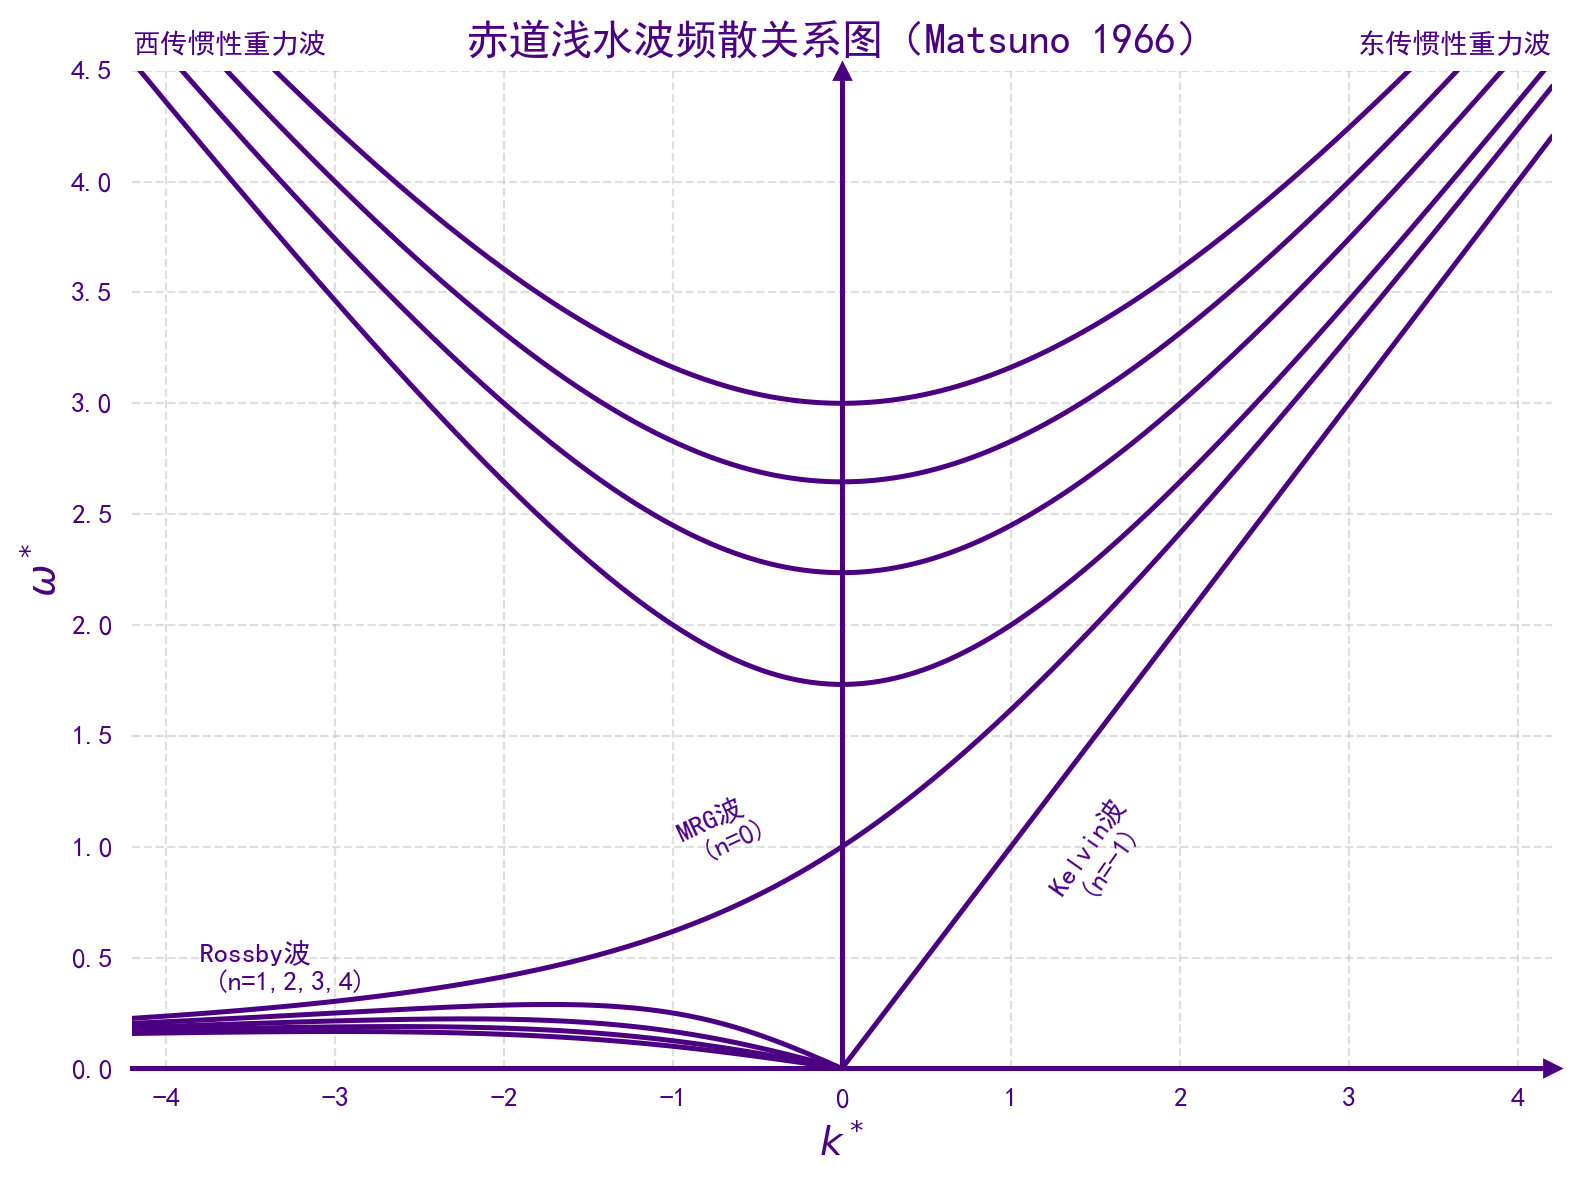

In [2]:

import matplotlib.pyplot as plt
import numpy as np
# ================================================================================================
# Author: %(Jianpu)s | Affiliation: Hohai
# email : xianpuji@hhu.edu.cn
# =================================================================================================
# 定义各类波的频散关系
def omega_gravity(k, n):
    return np.sqrt(k**2 + 2 * n + 1)

def omega_rossby(k, n):
    return -k / (k**2 + 2 * n + 1)

def omega_mixed_rossby_gravity(k):
    return 0.5 * (k + np.sqrt(k**2 + 4))


def plot_kelvin(ax, k, color, lw):
    k_pos = k[k > 0]
    ax.plot(k_pos, k_pos, label='Kelvin波', color=color, linewidth=lw)

def plot_mrg(ax, k, omega_func, color, lw):
    k_pos = k[k > 0]
    k_neg = k[k <= 0]
    ax.plot(k_neg, omega_func(k_neg), color=color, label='MRG波', linewidth=lw)
    ax.plot(k_pos, omega_func(k_pos), color=color, linewidth=lw)

def plot_rossby(ax, k, omega_func, color, lw, n_max=4):
    k_neg = k[k < 0]
    for n in range(1, n_max+1):
        omega_r = omega_func(k_neg, n)
        ax.plot(k_neg, omega_r, color=color, linewidth=lw)

def plot_gravity(ax, k, omega_func, color, lw, n_max=4):
    for n in range(1, n_max+1):
        omega_g = omega_func(k, n)
        ax.plot(k, omega_g, color=color, linewidth=lw)
        if n == 1:
            ax.plot([], [], color=color, label='惯性重力波')

def style_axes(ax, color, lw):
    ax.axhline(0, color=color, linewidth=lw)
    ax.axvline(0, color=color, linewidth=lw)
    ax.set_xlabel(r'$k^*$', fontsize=14, color=color)
    ax.set_ylabel(r'$\omega^*$', fontsize=14, color=color)
    ax.set_xlim(-4.2, 4.2)
    ax.set_ylim(0, 4.5)

    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.8)
    ax.spines['bottom'].set_color(color)

    ax.tick_params(axis='both', colors=color, width=0)
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_color(color)

    ax.plot(1, 0, ">", transform=ax.get_yaxis_transform(), clip_on=False, color=color)
    ax.plot(0, 1, "^", transform=ax.get_xaxis_transform(), clip_on=False, color=color)

def annotate(ax, color):
    ax.text(1.2, 0.7, 'Kelvin波 \n (n=-1)', fontsize=10, rotation=55, color=color)
    ax.text(-3.8, 0.35, 'Rossby波 \n (n=1,2,3,4)', fontsize=10, color=color)
    ax.text(-1, 0.9, 'MRG波 \n (n=0)', fontsize=10, rotation=25, color=color)
    ax.set_title('赤道浅水波频散关系图（Matsuno 1966）', fontsize=15, color=color)
    ax.set_title('东传惯性重力波', fontsize=10, loc='right', color=color)
    ax.set_title('西传惯性重力波', fontsize=10, loc='left', color=color)

def plot_equatorial_waves(k, omega_mrg, omega_rossby, omega_gravity, main_color='k', linewidth=1.8):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

    # 绘制各类波动
    plot_kelvin(ax, k, main_color, linewidth)
    plot_mrg(ax, k, omega_mrg, main_color, linewidth)
    plot_rossby(ax, k, omega_rossby, main_color, linewidth)
    plot_gravity(ax, k, omega_gravity, main_color, linewidth)

    # 样式设置
    style_axes(ax, main_color, linewidth)
    annotate(ax, main_color)
    ax.grid(True, linestyle='--', alpha=0.4)
    
    plt.tight_layout()
    plt.show()
    fig.savefig('频散曲线理论关系图.png',dpi=600,bbox_inches='tight')
    
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #正常显示负号
# 示例 k 轴（你应该根据实际数据定义）
k = np.linspace(-4.2, 4.2, 500)
# 通用配色（深蓝紫色）
main_color = '#4B0082'
linewidth = 1.8

plot_equatorial_waves(
    k=k,
    omega_mrg=omega_mixed_rossby_gravity,
    omega_rossby=omega_rossby,
    omega_gravity=omega_gravity,
    main_color=main_color,
    linewidth=1.8
)


# %%

### 2、理论Kelvin波水平结构分布图

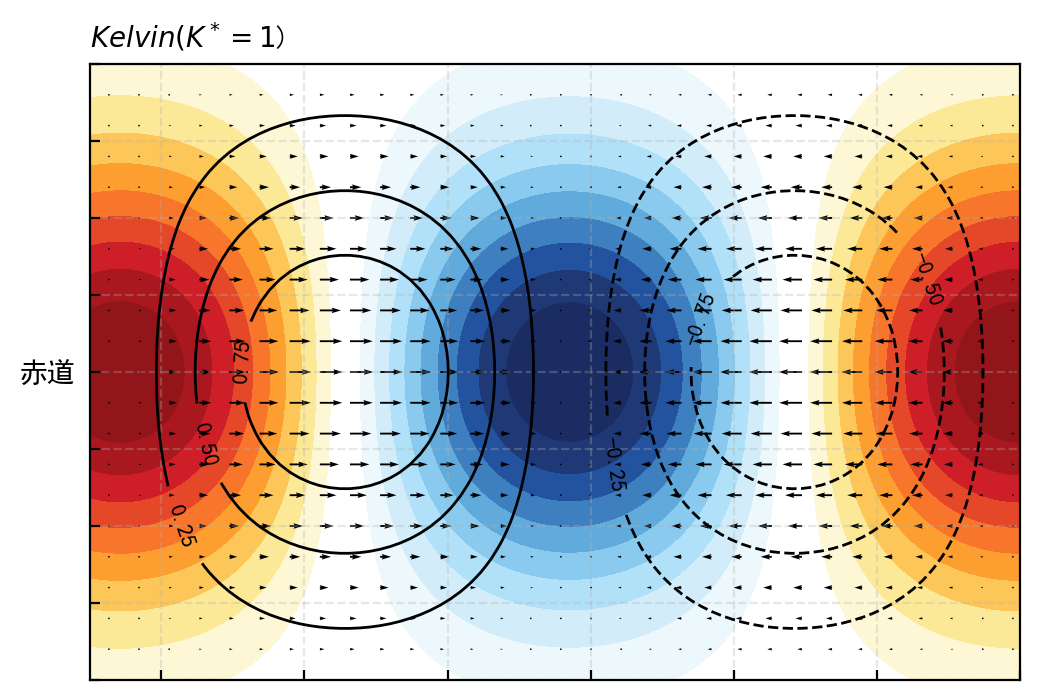

In [3]:


import matplotlib.pyplot as plt
import numpy as np
import cmaps


# ================================================================================================
# Author: %(Jianpu)s | Affiliation: Hohai
# email : xianpuji@hhu.edu.cn
# Last modified:  %(date)s
# Filename: 
# =================================================================================================

    
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #正常显示负号
# 网格设置


def plot_kelvin_wave(k=1.0, omega=1.0, t=0.0, 
                     xlim=(0, 4*np.pi), ylim=(-3, 3), 
                     nx=180, ny=91):
    """
    绘制 Kelvin 波的水平风场（u, v=0）、位势场（Φ）和散度（∇·u）
    
    参数：
        k, omega : 波数与频率
        t        : 时间截面
        xlim     : x 方向范围 (起点, 终点)
        ylim     : y 方向范围 (起点, 终点)
        nx, ny   : x/y 网格点数量
    """
    # 创建网格
    x = np.linspace(xlim[0], xlim[1], nx)
    y = np.linspace(ylim[0], ylim[1], ny)
    X, Y = np.meshgrid(x, y)

    # Kelvin 波理论解
    u = np.exp(-0.5 * Y**2) * np.cos(k * X - omega * t)
    v = np.zeros_like(u)
    Phi = (omega / k) * u
    
    # 计算散度 ∂u/∂x
    du_dx = np.gradient(u, x, axis=1)
    divergence = du_dx
    cmap =  cmaps.BlueWhiteOrangeRed
    # 绘图
    plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #正常显示负号
    fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
    plt.title(r"$Kelvin (K^*=1$)", fontsize=10,loc='left')
    # 散度填色背景
    cf = plt.contourf(X, Y, divergence, levels=21, cmap=cmap, extend='both')
    # cbar = plt.colorbar(cf, label='散度')
    # cbar.ax.tick_params(axis='both', direction='in',  )
    # 风矢量
    step = 3
    plt.quiver(X[::step,::step], Y[::step,::step], u[::step,::step], v[::step,::step], scale=40, width=0.002, color='black')
    ax.text(4.4, 0, '赤道', va='center', ha='right', fontsize=10)
    # 位势场等值线
    cs = plt.contour(X, Y, Phi,  levels=[-0.75,-0.5,-0.25,0.25,0.5,0.75], colors='k', linewidths=1)
    plt.clabel(cs, inline=True, fontsize=8)
    ax.set_ylim(-2,2)
    ax.set_xlim(4.5,11)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', direction='in',  )
    # 轴标签
    # plt.xlabel("x")
    # plt.ylabel("y")
    plt.grid(True, linestyle='--', alpha=0.3)
    # plt.tight_layout()
    plt.show()
    fig.savefig('kelvin波水平分布图.png',dpi=600, bbox_inches='tight')
plot_kelvin_wave(k=1, omega=1.0, t=0.0)

### 3、CCKW热带空间分布

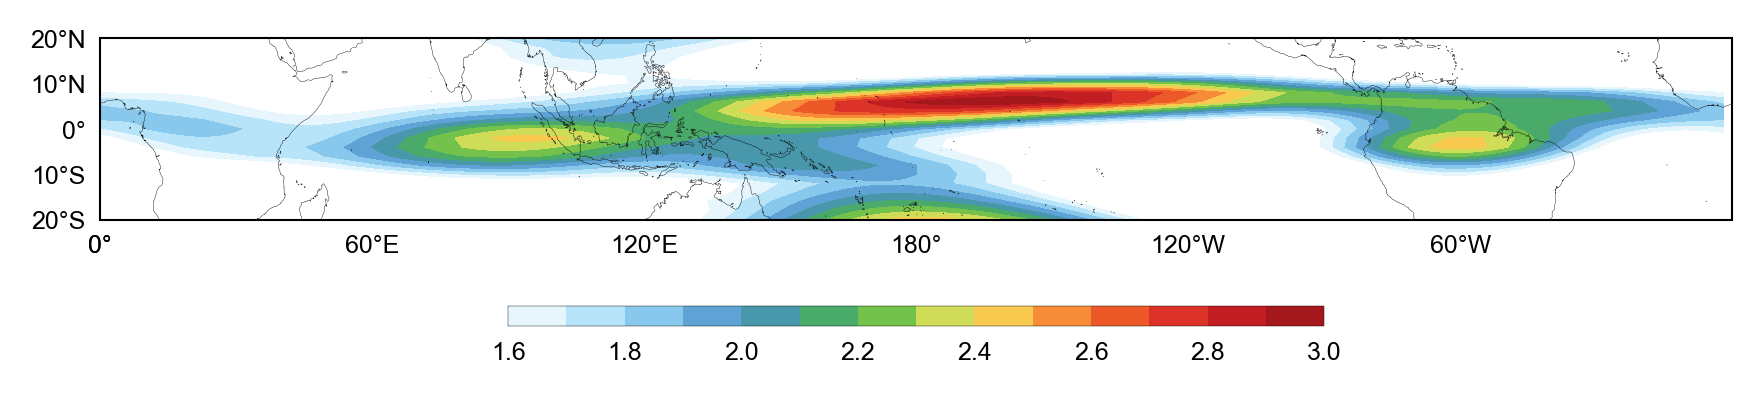

In [ ]:

import matplotlib.ticker as ticker
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import pandas as pd
from matplotlib import gridspec
from matplotlib.colors import ListedColormap 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os
import glob
from datetime import datetime, timedelta
import cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cftime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches

plt.rcParams['axes.linewidth'] = 1
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 6
obs_file = r"I:/pr_day_GPCP_1997-2014_interp_2x2_kelvin_25.nc"
# lon is not sel
obs = xr.open_dataset(obs_file).sel(lat=slice(-20, 20), time=slice('1997', '2014')).kelvin.std('time')
lon = obs.lon.data
lat = obs.lat.data
pr  = obs
def get_cmap_pr():
    newcmp = cmaps.WhiteBlueGreenYellowRed
    index = [1, 5, 20, 35, 50, 65, 85, 95, 110,]
    color_list = [newcmp(i / 110) for i in index]
    color_list[0] = [1., 1., 1.]
    return color_list

def makefig(lon,lat,pr,ax,rmsetitle=None):
    xstep,ystep = 6,5
    
    
    box = [0,361,-20,20]
    ax.set_xlim(box[0], box[1])
    ax.set_ylim(box[2], box[3])
    ax.set_extent(box,crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(box[0], box[1], 60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3], 10), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='white',linewidth=0.01, zorder=3,alpha=0.5)
    ax.coastlines(linewidth=0.1)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent(box, crs=ccrs.PlateCarree())
    fillplot = ax.contourf(lon,lat,pr,
                           levels=np.linspace(1.6,3,15),
                           cmap=cmaps.WhiteBlueGreenYellowRed,
                           # colors=get_cmap_pr(),   
                                transform=ccrs.PlateCarree()
                                )
    plt.ylabel('')
    plt.xlabel('')
    # ax.set_title("(" +rmsetitle+")",loc='left')
    ax.tick_params(which='major',length=0)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    # ax.set_aspect(5)
    cbar = fig.colorbar(fillplot,orientation='horizontal',pad=0.08,shrink=.5,aspect=40)
    cbar.ax.tick_params(which='major',direction='in',length=0)
    cbar.outline.set_linewidth(0.1)
    return ax,fillplot


gs = gridspec.GridSpec(1, 1)
fig = plt.figure(dpi=300)  # 设置Figure的尺寸
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.15, wspace=0.15, hspace=0.22)
# cbar_ax = fig.add_axes([0.25, 0.12, 0.55, 0.01]) 
ax = fig.add_subplot(gs[0, 0],projection = ccrs.PlateCarree(180))

makefig( lon, lat, pr, ax,'a')
fig.savefig('kelvin_std.png', dpi=600, bbox_inches='tight',format='png')



### 4、滤波以及PCF投影的空间分布图

d:\anaconda\ANACONDA\envs\pnew\lib\site-packages\cartopy\mpl\geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


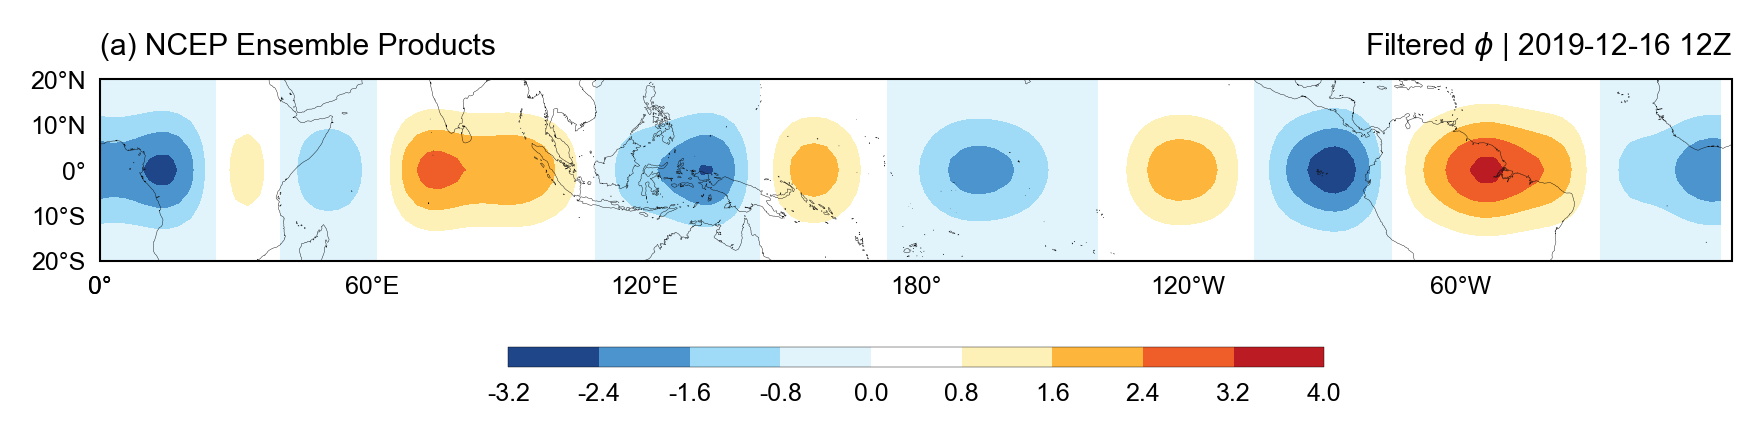

In [ ]:

import matplotlib.ticker as ticker
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import pandas as pd
from matplotlib import gridspec
from matplotlib.colors import ListedColormap 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os
import glob
from datetime import datetime, timedelta
import cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cftime
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from scipy import signal

class EquatorialWaveFilter:
    """赤道波分解处理器"""
    
    def __init__(self, u_path: str, v_path: str, z_path: str):
        """
        初始化波动分解器
        
        Parameters:
            u_path: 纬向风场数据路径
            v_path: 经向风场数据路径  
            z_path: 位势高度场数据路径
        """
        # 加载原始数据集
        self.ds_u = xr.open_dataset(u_path)
        self.ds_v = xr.open_dataset(v_path)
        self.ds_z = xr.open_dataset(z_path)
        
        # 提取核心变量
        self.u = self.ds_u.u.copy()
        self.v = self.ds_v.v.copy()
        self.z = self.ds_z.phi.copy()
        
        # 波动参数配置
        self.waves = ['Kelvin', 'WMRG', 'R1', 'R2']
        
        # 预处理和计算
        self._preprocess_data()
        self._compute_characteristic_vars()
        self._spectral_analysis()
        self._configure_constants()
        self._configure_wave_params()
        self._find_fre_wavenumber()
        self._compute_parabolic_cylinder()
        
    def _configure_constants(self):
        """配置物理常数"""
        self.g = 9.8                              # 重力加速度 (m/s²)
        self.beta = 2.3e-11                       # Beta参数 (m⁻¹s⁻¹)
        self.earth_radius = 6.371e6               # 地球半径 (m)
        self.spd = 86400.0                        # 一天的秒数
        self.ww = 2.0 * np.pi / self.spd          # 每天对应的角频率
        
        # 纬度参数
        self.y0_deg = 6.0                         # 纬度尺度 (°)
        self.y0_rad = 2 * np.pi * self.earth_radius * self.y0_deg / 360.0  # 转换为弧度
        self.ce = 2 * self.y0_rad**2 * self.beta  # 特征波速
        
        # 转换系数
        self.g_over_ce = self.g / self.ce
        self.ce_over_g = self.ce / self.g
        
        # 数据维度 - 从NumPy数组中获取维度，避免xarray维度问题
        self.nf = self.qf.shape[0]                # 时间维度
        self.nlat = self.qf.shape[1]              # 纬度维度
        self.nk = self.qf.shape[2]                # 经度维度
        
        # 频率和波数
        self.f = np.fft.fftfreq(self.nf)          # 频率
        self.k = np.fft.fftfreq(self.nk) * self.nk  # 波数
        
    def _configure_wave_params(self):
        """配置波动分析参数"""
        # 空间波数范围
        self.kmin = 2
        self.kmax = 20
        
        # 时间周期范围 (天)
        self.pmin = 3.0
        self.pmax = 30.0
        
        # 纬度范围
        self.lat_max = 20.0  # 最大纬度 (°)
        
    def _preprocess_data(self):
        """数据预处理：去趋势和加窗"""
        # 去趋势
        self.u.values = signal.detrend(self.u.values, axis=0)
        self.v.values = signal.detrend(self.v.values, axis=0)
        self.z.values = signal.detrend(self.z.values, axis=0)

        # 应用Tukey窗
        window = signal.windows.tukey(self.u.shape[0], alpha=0.1)
        window_expanded = window[:, np.newaxis, np.newaxis]
        self.u.values = self.u.values * window_expanded
        self.v.values = self.v.values * window_expanded
        self.z.values = self.z.values * window_expanded
        
    def _compute_characteristic_vars(self):
        """计算特征变量q和r"""
        # 计算q=z*(g/c) + u; r=z*(g/c) - u 
        # 使用values属性避免xarray计算问题
        g_over_ce = 9.8 / (2 * (2 * np.pi * 6.371e6 * 6.0 / 360.0)**2 * 2.3e-11)  # 临时计算
        self.q = xr.DataArray(
            self.z.values * g_over_ce + self.u.values,
            coords=self.u.coords,
            dims=self.u.dims
        )
        self.r = xr.DataArray(
            self.z.values * g_over_ce - self.u.values,
            coords=self.u.coords,
            dims=self.u.dims
        )
        
    def _spectral_analysis(self):
        """执行二维傅里叶变换"""
        # 直接使用NumPy的FFT函数处理values属性
        self.qf = np.fft.fft2(self.q.values, axes=(0, 2))
        self.vf = np.fft.fft2(self.v.values, axes=(0, 2))
        self.rf = np.fft.fft2(self.r.values, axes=(0, 2))
        
    def _find_fre_wavenumber(self):
        """找出频率和波数范围"""
        # 根据周期范围确定频率索引
        self.fmin = np.where(self.f >= 1.0 / self.pmax)[0][0]
        self.fmax = np.where(self.f > 1.0 / self.pmin)[0][0] - 1
        
        # 正频率和负频率范围
        self.f1p = self.fmin
        self.f2p = self.fmax + 1
        self.f1n = self.nf - self.fmax
        self.f2n = self.nf - self.fmin + 1
        
        # 正波数和负波数范围
        self.k1p = self.kmin
        self.k2p = self.kmax + 1
        self.k1n = self.nk - self.kmax
        self.k2n = self.nk - self.kmin + 1
        
    def _compute_parabolic_cylinder(self):
        """计算抛物线柱函数"""
        # 获取纬度值并归一化
        y_values = self.u.Y.values if hasattr(self.u, 'Y') else self.u.lat.values
        y = y_values / self.y0_deg
        y_sq = y**2
        
        # 生成抛物线柱函数(前4阶)
        self.d = np.zeros((4, len(y)))
        self.d[0] = np.exp(-y_sq/4)                    # D0
        self.d[1] = y * self.d[0]                      # D1
        self.d[2] = (y_sq - 1) * self.d[0]             # D2
        self.d[3] = y * (y_sq - 3) * self.d[0]         # D3
        
        # 归一化系数
        self.norm_factors = np.sqrt(2*np.pi) * np.array([1, 1, 2, 6])
        
        # 纬度间隔(用于积分)
        lat_coord = 'Y' if hasattr(self.u, 'Y') else 'lat'
        self.dlat = np.abs(self.u[lat_coord][1].values - self.u[lat_coord][0].values) * np.pi/180.0
    
    def decompose_waves(self):
        """分解赤道波动"""
        # 归一化因子
        dsq = np.sqrt(2.0 * np.pi) * np.array([1, 1, 2, 6])
        
        # 初始化Kelvin波系数
        qf_Kel = np.zeros((self.nf, self.nk), dtype='complex')
        
        # 初始化各模态系数
        qf_mode = np.zeros((len(dsq), self.nf, self.nk), dtype='complex')
        vf_mode = np.zeros((len(dsq), self.nf, self.nk), dtype='complex')
        rf_mode = np.zeros((len(dsq), self.nf, self.nk), dtype='complex')
        
        # 将数据转置为便于处理的形式
        qf = np.transpose(self.qf, (0, 2, 1))
        vf = np.transpose(self.vf, (0, 2, 1))
        rf = np.transpose(self.rf, (0, 2, 1))
        
        # 计算各模态的投影系数
        for m in range(len(dsq)):
            norm_divisor = dsq[m] / self.y0_deg
            
            # 计算Kelvin波系数(仅m=0)
            if m == 0:
                # 为正波数和正频率的情况
                for i in range(self.f1n, self.f2n):
                    for j in range(self.k1p, self.k2p):
                        qf_Kel[i, j] = np.sum(qf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
                
                # 为正波数和负频率的情况
                for i in range(self.f1p, self.f2p):
                    for j in range(self.k1n, self.k2n):
                        qf_Kel[i, j] = np.sum(qf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
            
            # 为四个范围计算模态系数
            # 1. 负频率-负波数
            for i in range(self.f1n, self.f2n):
                for j in range(self.k1n, self.k2n):
                    qf_mode[m, i, j] = np.sum(qf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
                    vf_mode[m, i, j] = np.sum(vf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
                    rf_mode[m, i, j] = np.sum(rf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
            
            # 2. 正频率-正波数
            for i in range(self.f1p, self.f2p):
                for j in range(self.k1p, self.k2p):
                    qf_mode[m, i, j] = np.sum(qf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
                    vf_mode[m, i, j] = np.sum(vf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
                    rf_mode[m, i, j] = np.sum(rf[i, j, :] * self.d[m, :] * self.dlat) / norm_divisor
        
        # 初始化波动场
        wave_count = len(self.waves)
        uf_wave = np.zeros((wave_count, self.nf, self.nlat, self.nk), dtype='complex')
        vf_wave = np.zeros((wave_count, self.nf, self.nlat, self.nk), dtype='complex')
        zf_wave = np.zeros((wave_count, self.nf, self.nlat, self.nk), dtype='complex')
        
        # 计算各类波动的贡献
        for w in range(wave_count):
            if self.waves[w] == 'Kelvin':
                for j in range(self.nlat):
                    uf_wave[w, :, j, :] = 0.5 * qf_Kel * self.d[0, j]
                    zf_wave[w, :, j, :] = 0.5 * qf_Kel * self.d[0, j] * self.ce_over_g
            
            elif self.waves[w] == 'WMRG':
                for j in range(self.nlat):
                    uf_wave[w, :, j, :] = 0.5 * qf_mode[1, :, :] * self.d[1, j]
                    vf_wave[w, :, j, :] = 0.5 * vf_mode[0, :, :] * self.d[0, j]
                    zf_wave[w, :, j, :] = 0.5 * qf_mode[1, :, :] * self.d[1, j] * self.ce_over_g
            
            elif self.waves[w] == 'R1':
                for j in range(self.nlat):
                    uf_wave[w, :, j, :] = 0.5 * (qf_mode[2, :, :] * self.d[2, j] - rf_mode[0, :, :] * self.d[0, j])
                    vf_wave[w, :, j, :] = 0.5 * vf_mode[1, :, :] * self.d[1, j]
                    zf_wave[w, :, j, :] = 0.5 * (qf_mode[2, :, :] * self.d[2, j] + rf_mode[0, :, :] * self.d[0, j]) * self.ce_over_g
            
            elif self.waves[w] == 'R2':
                for j in range(self.nlat):
                    uf_wave[w, :, j, :] = 0.5 * (qf_mode[3, :, :] * self.d[3, j] - rf_mode[1, :, :] * self.d[1, j])
                    vf_wave[w, :, j, :] = 0.5 * vf_mode[2, :, :] * self.d[2, j]
                    zf_wave[w, :, j, :] = 0.5 * (qf_mode[3, :, :] * self.d[3, j] + rf_mode[1, :, :] * self.d[1, j]) * self.ce_over_g
        
        # 结果保存
        results = {}
        coord_names = self._get_coordinate_names()
        
        for w in range(wave_count):
            wave_type = self.waves[w]
            # 逆变换回物理空间
            u_wave = self._inverse_transform(uf_wave[w], wave_type, "u", coord_names)
            v_wave = self._inverse_transform(vf_wave[w], wave_type, "v", coord_names)
            z_wave = self._inverse_transform(zf_wave[w], wave_type, "z", coord_names)
            
            results[wave_type] = {"u": u_wave, "v": v_wave, "z": z_wave}
        
        return results
    
    def _get_coordinate_names(self):
        """确定坐标轴名称"""
        time_coord = 'T' if hasattr(self.u, 'T') else 'time'
        lat_coord = 'Y' if hasattr(self.u, 'Y') else 'lat'
        lon_coord = 'X' if hasattr(self.u, 'X') else 'lon'
        
        return {
            'time': time_coord,
            'lat': lat_coord,
            'lon': lon_coord
        }
    
    def _inverse_transform(self, field, wave_type, var_type, coord_names):
        """反变换到物理空间并创建DataArray"""
        # 反变换
        phys_field = np.real(np.fft.ifft2(field, axes=(0, 2)))
        
        # 创建坐标字典
        coords = {
            coord_names['time']: self.ds_u[coord_names['time']].values,
            coord_names['lat']: self.ds_u[coord_names['lat']].values,
            coord_names['lon']: self.ds_u[coord_names['lon']].values
        }
        
        # 创建DataArray
        result = xr.DataArray(
            phys_field, 
            coords=coords,
            dims=[coord_names['time'], coord_names['lat'], coord_names['lon']], 
            name=var_type
        )
        
        # 添加属性
        wave_descriptions = {
            'Kelvin': 'Kelvin Waves',
            'WMRG': 'Mixed Rossby-Gravity Waves',
            'R1': 'n = 1 Equatorial Rossby Waves',
            'R2': 'n = 2 Equatorial Rossby Waves'
        }
        
        var_descriptions = {
            'u': 'Zonal Wind',
            'v': 'Meridional Wind',
            'z': 'Geopotential Height'
        }
        
        var_units = {
            'u': 'm/s',
            'v': 'm/s',
            'z': 'm'
        }
        
        result.attrs['long_name'] = f"{wave_descriptions[wave_type]} in 850 hPa {var_descriptions[var_type]}"
        result.attrs['units'] = var_units[var_type]
        
        return result
    
# 创建分解器
wave_filter = EquatorialWaveFilter('I:/u.850.20N-20S.0-360.20160101-20201231.nc', 'I:/v.850.20N-20S.0-360.20160101-20201231.nc', 'I:/phi.850.20N-20S.0-360.20160101-20201231.nc')

# 分解波动
wave_results = wave_filter.decompose_waves()

# 获取特定波动的结果
kelvin_u = wave_results['Kelvin']['u']
kelvin_v = wave_results['Kelvin']['v']
kelvin_z = wave_results['Kelvin']['z']

z_filter_1 = kelvin_z.sel(X=slice(0, 360), Y=slice( 20,-20),T='2019-12-16')

def makefig(lon,lat,pr,ax,rmsetitle=None,contourf=None):
    xstep,ystep = 6,5
    box = [0,361,-20,20]
    ax.set_xlim(box[0], box[1])
    ax.set_ylim(box[2], box[3])
    ax.set_extent(box,crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(box[0], box[1], 60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3], 10), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='white',linewidth=0.01, zorder=3,alpha=0.5)
    ax.coastlines(linewidth=0.1)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent(box, crs=ccrs.PlateCarree())
    if contourf==True:
        
        fillplot = ax.contourf(lon,lat,pr,
                            # levels=np.linspace(-12,12,25),
                            linewidths=0.5,
                            cmap=cmaps.BlueWhiteOrangeRed,
                            # colors=get_cmap_pr(),   
                                transform=ccrs.PlateCarree()
                                )
        cbar = fig.colorbar(fillplot,orientation='horizontal',pad=0.08,shrink=.5,aspect=40)
        cbar.ax.tick_params(which='major',direction='in',length=0)
        cbar.outline.set_linewidth(0.1)
    elif contourf == False:
        ax.contour(lon,lat,pr,levels=[-3.2,-2.4,-1.6,-0.8,0.8,1.6,2.4,3.2],
                                colors='k',linewidths=0.5, transform=ccrs.PlateCarree())
    plt.ylabel('')
    plt.xlabel('')
    ax.set_title(rmsetitle,loc='left')\
    
    ax.tick_params(which='major',length=0)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    return ax
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 6
# plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.sans-serif'] = ['Times New Roman']
gs = gridspec.GridSpec(1, 1)


fig = plt.figure(dpi=300)  # 设置Figure的尺寸
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.15, wspace=0.15, hspace=0.22)
# cbar_ax = fig.add_axes([0.25, 0.12, 0.55, 0.01]) 
ax = fig.add_subplot(gs[0, 0],projection = ccrs.PlateCarree(180))
ax = makefig( z_filter_1.X.data, z_filter_1.Y.data, z_filter_1[0], ax,'(a) NCEP Ensemble Products',True)
ax.set_title('Filtered $\phi$ | 2019-12-16 12Z',loc='right')
# fig.savefig('Comparison FFT‐filtered (shading) and PCF‐filtered 850hpa.png', dpi=600, bbox_inches='tight',format='png')
plt.show()
# plt.close()    
